In [10]:
!pip install numpy pandas matplotlib kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

100%|██████████| 494k/494k [00:01<00:00, 354kB/s]

Extracting files...


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/adrianmcmahon/imdb-india-movies/versions/1
Found CSV file: IMDb Movies India.csv
MOVIE RATING PREDICTION PIPELINE
Loading dataset...
Dataset loaded successfully! Shape: (15509, 10)

EXPLORATORY DATA ANALYSIS

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None

First few rows:
                                 Name    Year Duration       

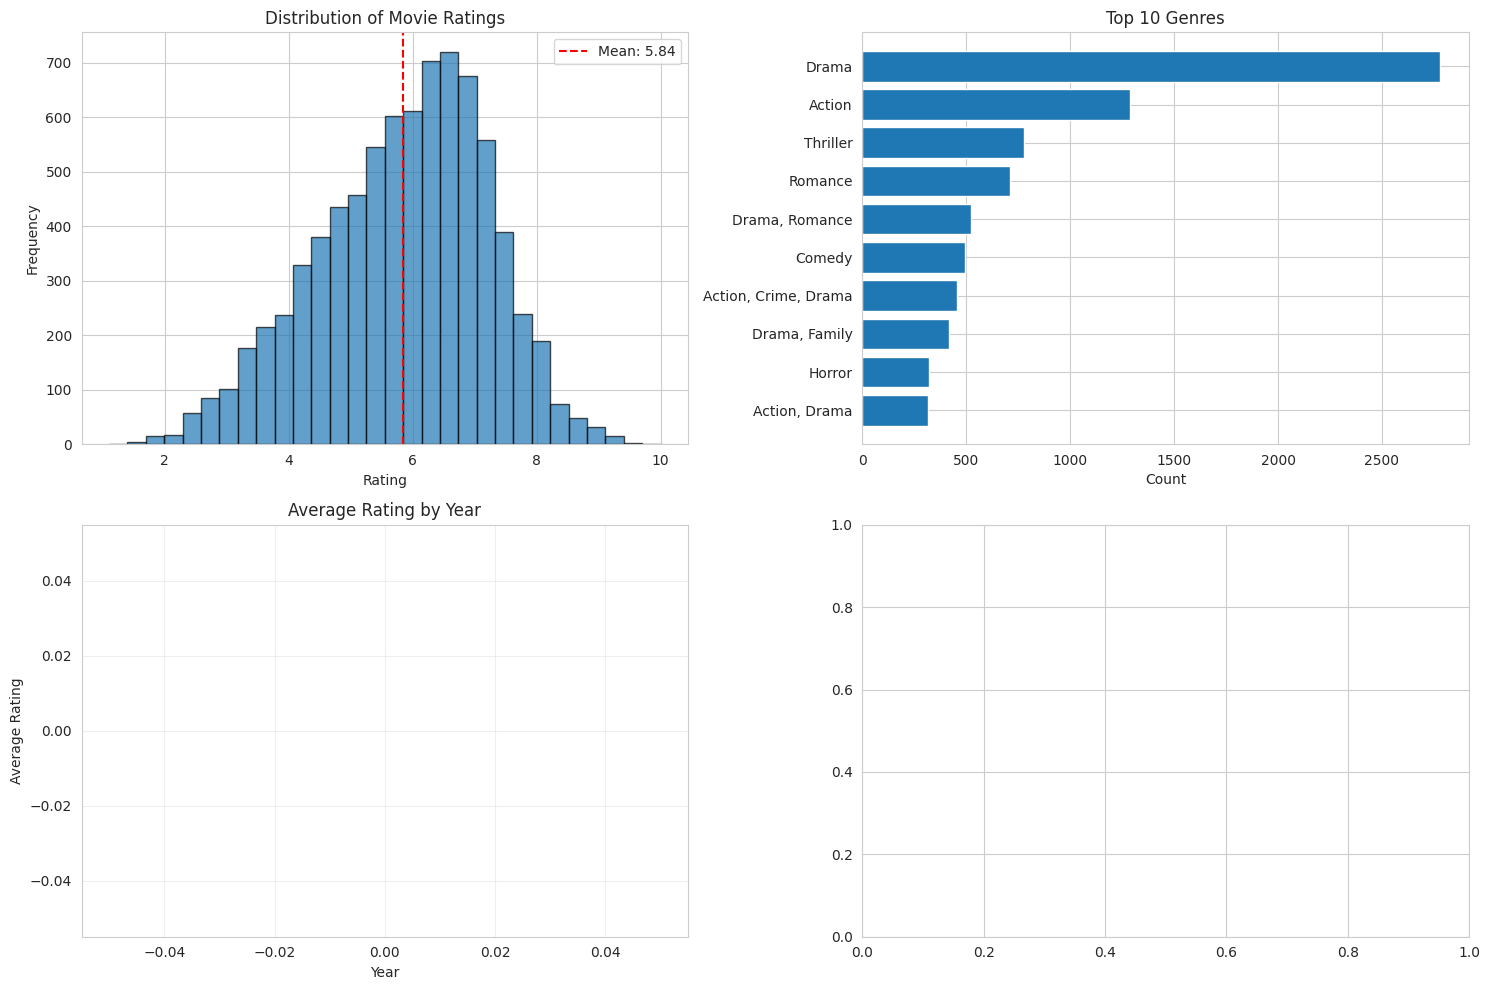


DATA PREPROCESSING & FEATURE ENGINEERING

Features selected: ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration', 'Votes']

Engineering additional features...

Encoding categorical features: ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

Training feature matrix shape: (7919, 14)
Training target variable shape: (7919,)
Full dataset feature matrix shape: (15509, 14)

Splitting training data into train and test sets...
Training set size: 6335
Test set size: 1584

Scaling features...

MODEL TRAINING

Training Linear Regression...
  Train RMSE: 0.7508
  Test RMSE: 0.7462
  Test R²: 0.7005
  Test MAE: 0.5433
  CV RMSE: 0.7538

Training Ridge Regression...
  Train RMSE: 0.7508
  Test RMSE: 0.7462
  Test R²: 0.7005
  Test MAE: 0.5433
  CV RMSE: 0.7538

Training Lasso Regression...
  Train RMSE: 0.7671
  Test RMSE: 0.7587
  Test R²: 0.6904
  Test MAE: 0.5439
  CV RMSE: 0.7676

Training Random Forest...
  Train RMSE: 0.2611
  Test RMSE: 0.6874
  Test R²: 0.7458
  

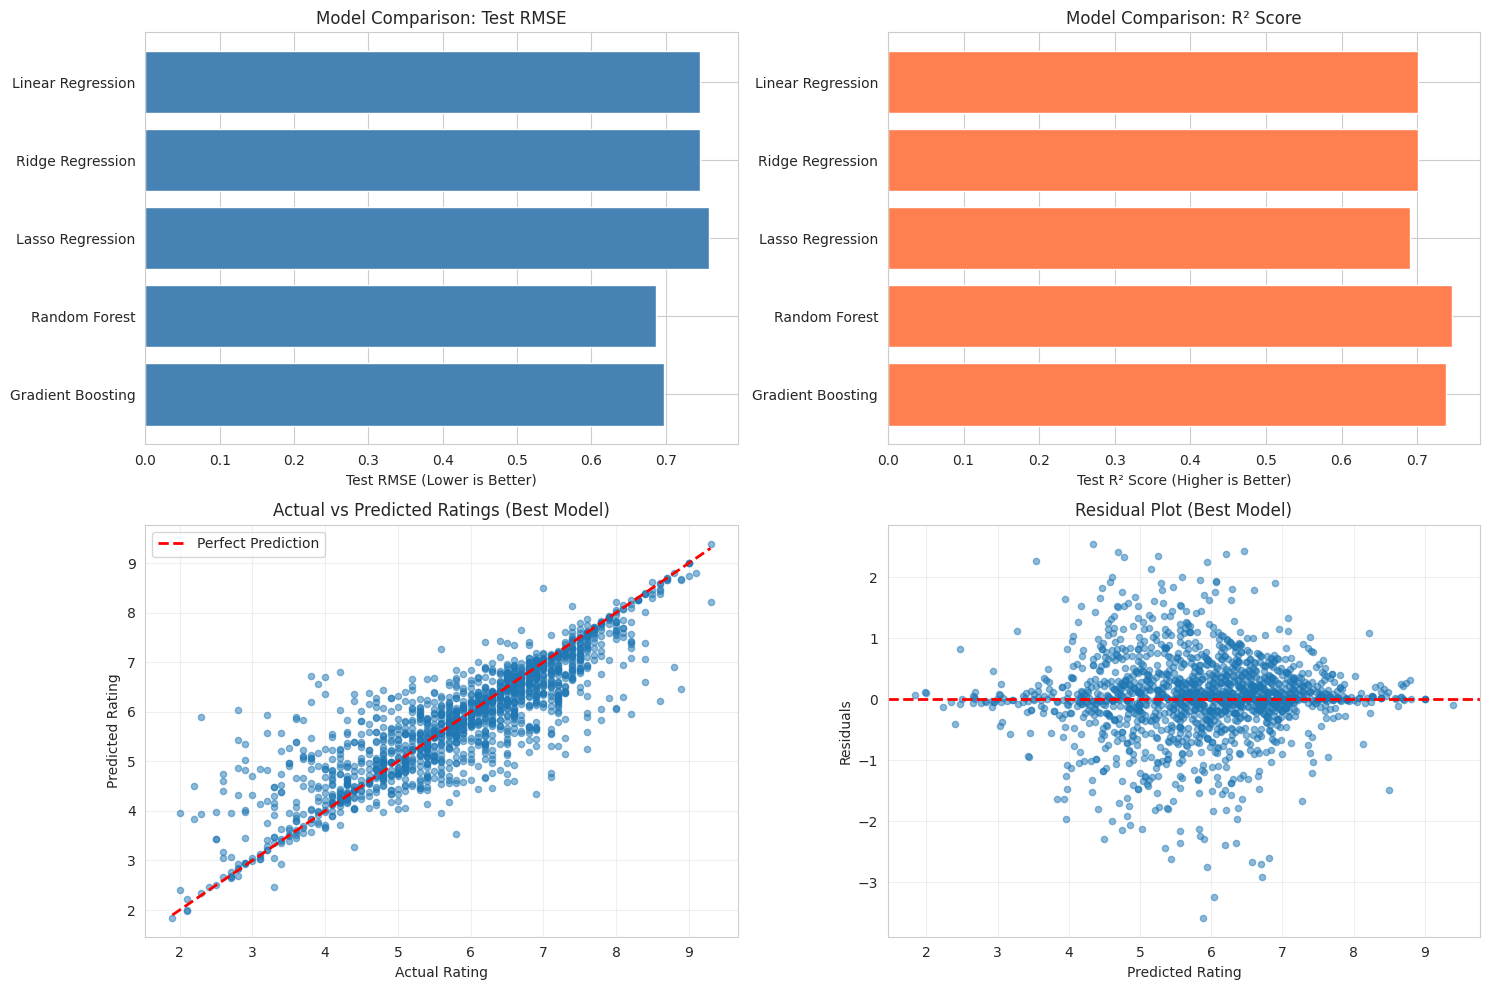


FEATURE IMPORTANCE

Top 10 Most Important Features:
             Feature  Importance
 Director_Avg_Rating    0.620911
   Actor1_Avg_Rating    0.130808
               Votes    0.052992
                Year    0.027653
Director_Movie_Count    0.024208
             Actor 3    0.020168
    Genre_Avg_Rating    0.019410
  Actor1_Movie_Count    0.019310
             Actor 2    0.018514
            Duration    0.015052

Feature importance plot saved as 'feature_importance.png'


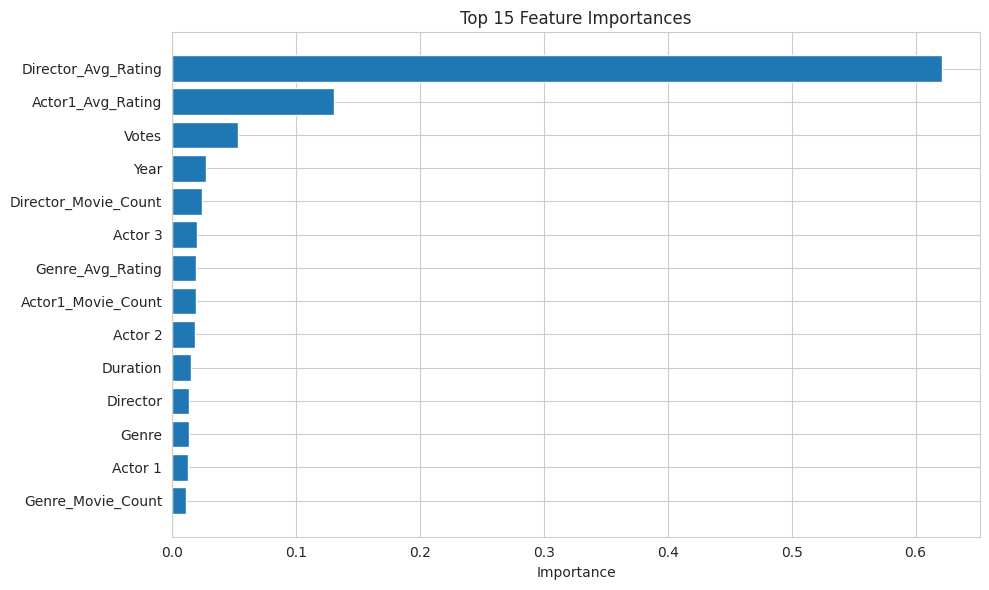


GENERATING PREDICTIONS FOR FULL DATASET
Predictions generated and added to the dataframe.

PIPELINE COMPLETED SUCCESSFULLY!

FINAL SUMMARY

Model Performance Comparison:
                   Train RMSE  Test RMSE  Train R²   Test R²  Test MAE   CV RMSE
Linear Regression    0.750750   0.746214  0.706596  0.700489  0.543335  0.753827
Ridge Regression     0.750750   0.746213  0.706596  0.700490  0.543330  0.753827
Lasso Regression     0.767070   0.758728  0.693701  0.690359  0.543893  0.767554
Random Forest        0.261144   0.687422  0.964500  0.745824  0.457572  0.697809
Gradient Boosting    0.642448   0.697214  0.785142  0.738532  0.492684  0.693397

DATASET WITH PREDICTED RATINGS


,Name,Year,Rating,Predicted_Rating
0,,NaN,NaN,5.817
1,#Gadhvi (He thought he was Gandhi),(2019),7.0,6.979
2,#Homecoming,(2021),NaN,5.776
3,#Yaaram,(2019),4.4,4.325
4,...And Once Again,(2010),NaN,6.921



Shape of dataset with predictions: (15509, 11)


In [11]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

class MovieRatingPredictor:
    """
    A comprehensive movie rating prediction system using multiple regression techniques.
    """

    def __init__(self, filepath):
        """Initialize the predictor with dataset filepath"""
        self.filepath = filepath
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.X_scaled = None # Add attribute for scaled full dataset
        self.models = {}
        self.best_model = None
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.feature_columns = [] # Store feature columns after preprocessing

    def load_data(self):
        """Load the dataset"""
        print("Loading dataset...")
        # Try different encodings if 'utf-8' fails
        try:
            self.df = pd.read_csv(self.filepath, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                self.df = pd.read_csv(self.filepath, encoding='latin-1')
            except UnicodeDecodeError:
                try:
                    self.df = pd.read_csv(self.filepath, encoding='ISO-8859-1')
                except Exception as e:
                    print(f"Error reading CSV with multiple encodings: {e}")
                    raise  # Re-raise the exception if none work

        print(f"Dataset loaded successfully! Shape: {self.df.shape}")
        return self.df

    def explore_data(self):
        """Perform exploratory data analysis"""
        print("\n" + "="*60)
        print("EXPLORATORY DATA ANALYSIS")
        print("="*60)

        print("\nDataset Info:")
        print(self.df.info())

        print("\nFirst few rows:")
        print(self.df.head())

        print("\nStatistical Summary:")
        print(self.df.describe())

        print("\nMissing Values:")
        missing = self.df.isnull().sum()
        print(missing[missing > 0])

        print("\nTarget Variable (Rating) Distribution:")
        print(self.df['Rating'].describe())

        return self.df

    def visualize_data(self):
        """Create visualizations for data exploration"""
        print("\nGenerating visualizations...")

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # 1. Rating distribution
        axes[0, 0].hist(self.df['Rating'].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[0, 0].set_xlabel('Rating')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].set_title('Distribution of Movie Ratings')
        axes[0, 0].axvline(self.df['Rating'].mean(), color='red', linestyle='--',
                          label=f'Mean: {self.df["Rating"].mean():.2f}')
        axes[0, 0].legend()

        # 2. Top genres
        if 'Genre' in self.df.columns:
            genre_counts = self.df['Genre'].value_counts().head(10)
            axes[0, 1].barh(genre_counts.index, genre_counts.values)
            axes[0, 1].set_xlabel('Count')
            axes[0, 1].set_title('Top 10 Genres')
            axes[0, 1].invert_yaxis()

        # 3. Rating by year (if Year column exists)
        if 'Year' in self.df.columns:
            # Convert 'Year' to numeric, coerce errors to NaN, then drop NaNs for plotting
            temp_df = self.df.copy()
            temp_df['Year'] = pd.to_numeric(temp_df['Year'], errors='coerce')
            year_rating = temp_df.dropna(subset=['Year', 'Rating']).groupby('Year')['Rating'].mean()
            axes[1, 0].plot(year_rating.index, year_rating.values, marker='o')
            axes[1, 0].set_xlabel('Year')
            axes[1, 0].set_ylabel('Average Rating')
            axes[1, 0].set_title('Average Rating by Year')
            axes[1, 0].grid(True, alpha=0.3)

        # 4. Correlation with numeric features
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 1:
            corr_with_rating = self.df[numeric_cols].corr()['Rating'].sort_values(ascending=False)
            axes[1, 1].barh(corr_with_rating.index, corr_with_rating.values)
            axes[1, 1].set_xlabel('Correlation with Rating')
            axes[1, 1].set_title('Feature Correlation with Rating')
            axes[1, 1].axvline(x=0, color='black', linestyle='--', linewidth=0.5)

        plt.tight_layout()
        plt.savefig('eda_plots.png', dpi=300, bbox_inches='tight')
        print("Visualizations saved as 'eda_plots.png'")
        plt.show()

    def preprocess_data(self):
        """Preprocess and engineer features"""
        print("\n" + "="*60)
        print("DATA PREPROCESSING & FEATURE ENGINEERING")
        print("="*60)

        df = self.df.copy()

        # Handle missing values in target variable - Keep rows for prediction later
        # print(f"\nRows before removing missing ratings: {len(df)}")
        # df = df.dropna(subset=['Rating'])
        # print(f"Rows after removing missing ratings: {len(df)}")

        # Select features for modeling
        feature_columns = []

        # Genre feature
        if 'Genre' in df.columns:
            df['Genre'] = df['Genre'].fillna('Unknown')
            feature_columns.append('Genre')

        # Director feature
        if 'Director' in df.columns:
            df['Director'] = df['Director'].fillna('Unknown')
            # Extract first director if multiple
            df['Director'] = df['Director'].apply(lambda x: str(x).split(',')[0].strip())
            feature_columns.append('Director')

        # Actor features
        if 'Actor 1' in df.columns:
            df['Actor 1'] = df['Actor 1'].fillna('Unknown')
            feature_columns.append('Actor 1')

        if 'Actor 2' in df.columns:
            df['Actor 2'] = df['Actor 2'].fillna('Unknown')
            feature_columns.append('Actor 2')

        if 'Actor 3' in df.columns:
            df['Actor 3'] = df['Actor 3'].fillna('Unknown')
            feature_columns.append('Actor 3')

        # Year feature
        if 'Year' in df.columns:
            df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})').astype(float) # Extract year as float
            df['Year'] = df['Year'].fillna(df['Year'].median())
            feature_columns.append('Year')

        # Duration feature
        if 'Duration' in df.columns:
            df['Duration'] = df['Duration'].astype(str).str.extract(r'(\d+)').astype(float) # Extract minutes as float
            df['Duration'] = df['Duration'].fillna(df['Duration'].median())
            feature_columns.append('Duration')

        # Votes feature
        if 'Votes' in df.columns:
            df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=False) # Remove commas from Votes
            df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
            df['Votes'] = df['Votes'].fillna(df['Votes'].median())
            feature_columns.append('Votes')

        print(f"\nFeatures selected: {feature_columns}")
        self.feature_columns = feature_columns # Store feature columns

        # Create feature engineering
        print("\nEngineering additional features...")

        # Director popularity (number of movies)
        if 'Director' in feature_columns:
            director_counts = df['Director'].value_counts()
            df['Director_Movie_Count'] = df['Director'].map(director_counts)
            # Calculate mean rating for directors, fill NaNs with global mean rating
            df['Director_Avg_Rating'] = df.groupby('Director')['Rating'].transform('mean').fillna(df['Rating'].mean())
            feature_columns.extend(['Director_Movie_Count', 'Director_Avg_Rating'])

        # Actor popularity
        if 'Actor 1' in feature_columns:
            actor1_counts = df['Actor 1'].value_counts()
            df['Actor1_Movie_Count'] = df['Actor 1'].map(actor1_counts)
             # Calculate mean rating for Actor 1, fill NaNs with global mean rating
            df['Actor1_Avg_Rating'] = df.groupby('Actor 1')['Rating'].transform('mean').fillna(df['Rating'].mean())
            feature_columns.extend(['Actor1_Movie_Count', 'Actor1_Avg_Rating'])

        # Genre popularity
        if 'Genre' in feature_columns:
            genre_counts = df['Genre'].value_counts()
            df['Genre_Movie_Count'] = df['Genre'].map(genre_counts)
            # Calculate mean rating for genres, fill NaNs with global mean rating
            df['Genre_Avg_Rating'] = df.groupby('Genre')['Rating'].transform('mean').fillna(df['Rating'].mean())
            feature_columns.extend(['Genre_Movie_Count', 'Genre_Avg_Rating'])

        # Prepare X and y for training (only rows with non-null ratings)
        df_train = df.dropna(subset=['Rating']).copy()
        X_train_df = df_train[self.feature_columns].copy()
        y_train = df_train['Rating'].copy()

        # Prepare X for the full dataset (for prediction)
        X_full_df = df[self.feature_columns].copy()

        # Encode categorical variables on the full dataset to ensure consistency
        categorical_cols = X_full_df.select_dtypes(include=['object']).columns
        print(f"\nEncoding categorical features: {list(categorical_cols)}")

        for col in categorical_cols:
            le = LabelEncoder()
            # Fit on combined data to handle all categories
            combined_series = pd.concat([X_train_df[col], X_full_df[col]], axis=0).astype(str).unique()
            le.fit(combined_series)
            X_train_df[col] = le.transform(X_train_df[col].astype(str))
            X_full_df[col] = le.transform(X_full_df[col].astype(str))
            self.label_encoders[col] = le

        # Handle any remaining missing values in the training data
        X_train_df = X_train_df.fillna(X_train_df.median())

        # Handle any remaining missing values in the full dataset (for prediction)
        X_full_df = X_full_df.fillna(X_full_df.median())


        print(f"\nTraining feature matrix shape: {X_train_df.shape}")
        print(f"Training target variable shape: {y_train.shape}")
        print(f"Full dataset feature matrix shape: {X_full_df.shape}")

        return X_train_df, y_train, X_full_df

    def split_and_scale_data(self, X_train_df, y_train, X_full_df, test_size=0.2, random_state=42):
        """Split training data into train/test and scale features"""
        print("\nSplitting training data into train and test sets...")
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_train_df, y_train, test_size=test_size, random_state=random_state
        )

        print(f"Training set size: {len(self.X_train)}")
        print(f"Test set size: {len(self.X_test)}")

        # Scale features using the scaler fitted on the training data
        print("\nScaling features...")
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)
        self.X_scaled = self.scaler.transform(X_full_df) # Scale the full dataset

        # Impute missing values after scaling
        from sklearn.impute import SimpleImputer
        imputer = SimpleImputer(strategy='median')
        self.X_train_scaled = imputer.fit_transform(self.X_train_scaled)
        self.X_test_scaled = imputer.transform(self.X_test_scaled)
        self.X_scaled = imputer.transform(self.X_scaled) # Impute on the full scaled dataset


        return self.X_train_scaled, self.X_test_scaled, self.y_train, self.y_test, self.X_scaled

    def train_models(self):
        """Train multiple regression models"""
        print("\n" + "="*60)
        print("MODEL TRAINING")
        print("="*60)

        # Define models
        self.models = {
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(alpha=1.0),
            'Lasso Regression': Lasso(alpha=0.1),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
        }

        results = {}

        for name, model in self.models.items():
            print(f"\nTraining {name}...")

            # Train model
            model.fit(self.X_train_scaled, self.y_train)

            # Make predictions
            y_train_pred = model.predict(self.X_train_scaled)
            y_test_pred = model.predict(self.X_test_scaled)

            # Calculate metrics
            train_rmse = np.sqrt(mean_squared_error(self.y_train, y_train_pred))
            test_rmse = np.sqrt(mean_squared_error(self.y_test, y_test_pred))
            train_r2 = r2_score(self.y_train, y_train_pred)
            test_r2 = r2_score(self.y_test, y_test_pred)
            test_mae = mean_absolute_error(self.y_test, y_test_pred)

            # Cross-validation
            cv_scores = cross_val_score(model, self.X_train_scaled, self.y_train,
                                       cv=5, scoring='neg_mean_squared_error')
            cv_rmse = np.sqrt(-cv_scores.mean())

            results[name] = {
                'Train RMSE': train_rmse,
                'Test RMSE': test_rmse,
                'Train R²': train_r2,
                'Test R²': test_r2,
                'Test MAE': test_mae,
                'CV RMSE': cv_rmse
            }

            print(f"  Train RMSE: {train_rmse:.4f}")
            print(f"  Test RMSE: {test_rmse:.4f}")
            print(f"  Test R²: {test_r2:.4f}")
            print(f"  Test MAE: {test_mae:.4f}")
            print(f"  CV RMSE: {cv_rmse:.4f}")

        # Find best model based on test RMSE
        best_model_name = min(results, key=lambda x: results[x]['Test RMSE'])
        self.best_model = self.models[best_model_name]

        print(f"\n{'='*60}")
        print(f"BEST MODEL: {best_model_name}")
        print(f"{'='*60}")

        return results

    def visualize_results(self, results):
        """Visualize model comparison and predictions"""
        print("\nGenerating result visualizations...")

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # 1. Model comparison - Test RMSE
        model_names = list(results.keys())
        test_rmse = [results[m]['Test RMSE'] for m in model_names]

        axes[0, 0].barh(model_names, test_rmse, color='steelblue')
        axes[0, 0].set_xlabel('Test RMSE (Lower is Better)')
        axes[0, 0].set_title('Model Comparison: Test RMSE')
        axes[0, 0].invert_yaxis()

        # 2. Model comparison - R² Score
        test_r2 = [results[m]['Test R²'] for m in model_names]

        axes[0, 1].barh(model_names, test_r2, color='coral')
        axes[0, 1].set_xlabel('Test R² Score (Higher is Better)')
        axes[0, 1].set_title('Model Comparison: R² Score')
        axes[0, 1].invert_yaxis()
        axes[0, 1].axvline(x=0, color='black', linestyle='--', linewidth=0.5)

        # 3. Actual vs Predicted (Best Model)
        y_pred = self.best_model.predict(self.X_test_scaled)

        axes[1, 0].scatter(self.y_test, y_pred, alpha=0.5, s=20)
        axes[1, 0].plot([self.y_test.min(), self.y_test.max()],
                       [self.y_test.min(), self.y_test.max()],
                       'r--', lw=2, label='Perfect Prediction')
        axes[1, 0].set_xlabel('Actual Rating')
        axes[1, 0].set_ylabel('Predicted Rating')
        axes[1, 0].set_title('Actual vs Predicted Ratings (Best Model)')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # 4. Residuals plot
        residuals = self.y_test - y_pred

        axes[1, 1].scatter(y_pred, residuals, alpha=0.5, s=20)
        axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
        axes[1, 1].set_xlabel('Predicted Rating')
        axes[1, 1].set_ylabel('Residuals')
        axes[1, 1].set_title('Residual Plot (Best Model)')
        axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('model_results.png', dpi=300, bbox_inches='tight')
        print("Results saved as 'model_results.png'")
        plt.show()

    def feature_importance(self):
        """Display feature importance for tree-based models"""
        print("\n" + "="*60)
        print("FEATURE IMPORTANCE")
        print("="*60)

        if hasattr(self.best_model, 'feature_importances_'):
            importances = self.best_model.feature_importances_
            feature_names = self.X_train.columns

            if len(importances) == len(feature_names):
                feature_imp_df = pd.DataFrame({
                    'Feature': feature_names,
                    'Importance': importances
                }).sort_values('Importance', ascending=False)

                print("\nTop 10 Most Important Features:")
                print(feature_imp_df.head(10).to_string(index=False))

                # Plot
                plt.figure(figsize=(10, 6))
                top_features = feature_imp_df.head(15)
                plt.barh(top_features['Feature'], top_features['Importance'])
                plt.xlabel('Importance')
                plt.title('Top 15 Feature Importances')
                plt.gca().invert_yaxis()
                plt.tight_layout()
                plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
                print("\nFeature importance plot saved as 'feature_importance.png'")
                plt.show()
            else:
                 print("Error: Mismatch between feature importances and feature names.")
                 print(f"Number of importances: {len(importances)}")
                 print(f"Number of feature names: {len(feature_names)}")

        else:
            print("Feature importance is not available for the selected best model type.")

    def predict_on_full_dataset(self):
        """Generate predictions for the entire dataset using the best model"""
        print("\n" + "="*60)
        print("GENERATING PREDICTIONS FOR FULL DATASET")
        print("="*60)

        if self.best_model is None:
            print("Error: No model has been trained yet. Please run the pipeline first.")
            return None

        if self.X_scaled is None:
             print("Error: Full dataset not preprocessed and scaled. Please run the pipeline first.")
             return None

        # Make predictions on the scaled full dataset
        full_predictions = self.best_model.predict(self.X_scaled)

        # Add predictions to the original dataframe
        self.df['Predicted_Rating'] = full_predictions

        print("Predictions generated and added to the dataframe.")
        return self.df


    def run_complete_pipeline(self):
        """Run the complete ML pipeline"""
        print("="*60)
        print("MOVIE RATING PREDICTION PIPELINE")
        print("="*60)

        # Load data
        self.load_data()

        # Explore data
        self.explore_data()
        self.visualize_data()

        # Preprocess - Returns X_train_df, y_train, X_full_df
        X_train_df, y_train, X_full_df = self.preprocess_data()

        # Split and scale - Returns X_train_scaled, X_test_scaled, y_train, y_test, X_scaled
        self.split_and_scale_data(X_train_df, y_train, X_full_df)

        # Train models
        results = self.train_models()

        # Visualize results
        self.visualize_results(results)

        # Feature importance
        self.feature_importance()

        # Generate predictions for the full dataset
        self.predict_on_full_dataset()

        print("\n" + "="*60)
        print("PIPELINE COMPLETED SUCCESSFULLY!")
        print("="*60)

        return results


# Usage example
if __name__ == "__main__":
    # Download dataset from Kaggle using kagglehub
    import kagglehub
    print("Downloading dataset from Kaggle...")
    path = kagglehub.dataset_download("adrianmcmahon/imdb-india-movies")
    print(f"Path to dataset files: {path}")

    # Find the CSV file in the downloaded path
    import os
    csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

    if csv_files:
        csv_path = os.path.join(path, csv_files[0])
        print(f"Found CSV file: {csv_files[0]}")

        # Initialize predictor with the downloaded dataset
        predictor = MovieRatingPredictor(csv_path)

        # Run complete pipeline
        results = predictor.run_complete_pipeline()

        # Display final summary
        print("\n" + "="*60)
        print("FINAL SUMMARY")
        print("="*60)
        print("\nModel Performance Comparison:")
        results_df = pd.DataFrame(results).T
        print(results_df.to_string())

        # Display the dataframe with predictions
        print("\n" + "="*60)
        print("DATASET WITH PREDICTED RATINGS")
        print("="*60)
        display(predictor.df[['Name', 'Year', 'Rating', 'Predicted_Rating']].head()) # Display relevant columns
        print(f"\nShape of dataset with predictions: {predictor.df.shape}")

    else:
        print("Error: No CSV file found in the downloaded dataset!")
        print(f"Files in directory: {os.listdir(path)}")

In [12]:
# Display the first few rows of the dataframe with predicted ratings
print("First 10 rows of the full DataFrame with Predicted Ratings:")
display(predictor.df.head())

# Display the last few rows of the dataframe with predicted ratings
print("\nLast 10 rows of the full DataFrame with Predicted Ratings:")
display(predictor.df.tail())

First 10 rows of the full DataFrame with Predicted Ratings:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Predicted_Rating
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,5.817
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.979
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,5.776
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.325
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.921



Last 10 rows of the full DataFrame with Predicted Ratings:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Predicted_Rating
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,4.431
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,4.674
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,5.833
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,6.763
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.742


First 9 rows of DataFrame with Missing Actual Ratings and their Predicted Ratings:


,Name,Year,Rating,Predicted_Rating
0,,NaN,NaN,5.817
2,#Homecoming,(2021),NaN,5.776
4,...And Once Again,(2010),NaN,6.921
7,.in for Motion,(2008),NaN,5.990
14,101 Ratein,(1990),NaN,5.524


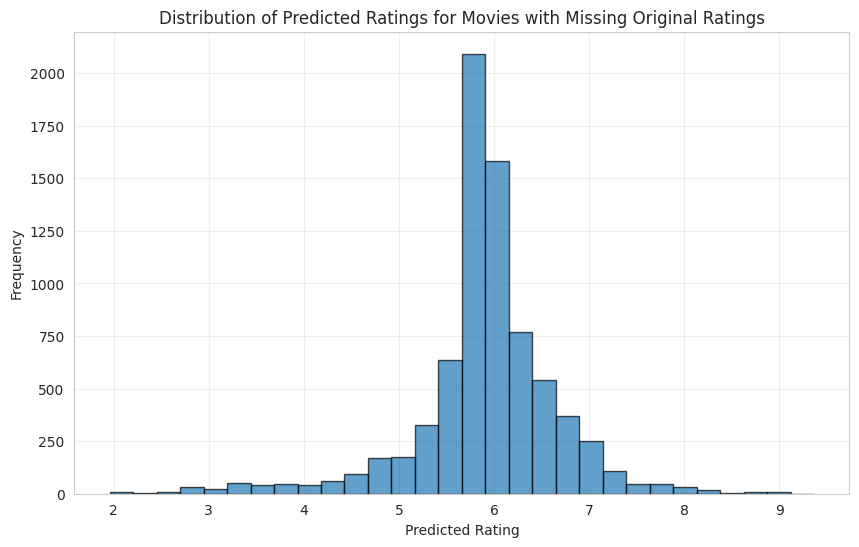


Statistical Summary of Predicted Ratings for Movies with Missing Original Ratings:


count    7590.000000
mean        5.906167
std         0.757037
min         1.959000
25%         5.699250
50%         5.907000
75%         6.223000
max         9.365000
Name: Predicted_Rating, dtype: float64

In [13]:
# Filter the dataframe to include only rows with missing actual ratings
df_missing_actual_ratings = predictor.df[predictor.df['Rating'].isnull()].copy()

# Display the first few rows of this filtered dataframe
print("First 9 rows of DataFrame with Missing Actual Ratings and their Predicted Ratings:")
display(df_missing_actual_ratings[['Name', 'Year', 'Rating', 'Predicted_Rating']].head())

# Visualize the distribution of predicted ratings for movies with missing actual ratings
plt.figure(figsize=(10, 6))
plt.hist(df_missing_actual_ratings['Predicted_Rating'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Ratings for Movies with Missing Original Ratings')
plt.grid(True, alpha=0.3)
plt.show()

# Optional: Display basic statistics for the predicted ratings in this subset
print("\nStatistical Summary of Predicted Ratings for Movies with Missing Original Ratings:")
display(df_missing_actual_ratings['Predicted_Rating'].describe())

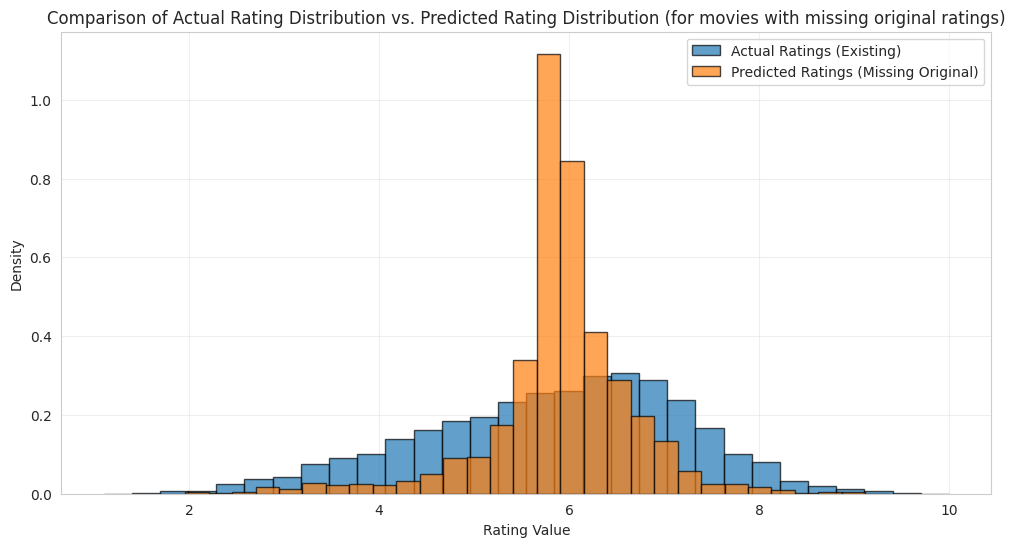

Comparison of distributions visualized.


In [14]:
# Get the dataframe with actual ratings (created in a previous step)
# If it doesn't exist, recreate it from the main dataframe
if 'df_with_actual_ratings' not in locals():
    df_with_actual_ratings = predictor.df.dropna(subset=['Rating']).copy()

# Get the dataframe with missing actual ratings (created in a previous step)
# If it doesn't exist, recreate it from the main dataframe
if 'df_missing_actual_ratings' not in locals():
     df_missing_actual_ratings = predictor.df[predictor.df['Rating'].isnull()].copy()


plt.figure(figsize=(12, 6))

# Plot histogram of actual ratings
plt.hist(df_with_actual_ratings['Rating'], bins=30, edgecolor='black', alpha=0.7, label='Actual Ratings (Existing)', density=True)

# Plot histogram of predicted ratings for movies with missing actuals
plt.hist(df_missing_actual_ratings['Predicted_Rating'], bins=30, edgecolor='black', alpha=0.7, label='Predicted Ratings (Missing Original)', density=True)

plt.xlabel('Rating Value')
plt.ylabel('Density')
plt.title('Comparison of Actual Rating Distribution vs. Predicted Rating Distribution (for movies with missing original ratings)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Comparison of distributions visualized.")

In [18]:
# Ensure df_largest_diff is available
if 'df_largest_diff' in locals():
    # Display the top 10 movies with the largest differences, including all columns
    print("Features of the Top 10 Movies with the Largest Difference Between Actual and Predicted Ratings:")
    display(df_largest_diff.head(10))
else:
    print("The dataframe with the largest differences (df_largest_diff) is not available. Please re-run the previous step to identify these movies.")

Features of the Top 10 Movies with the Largest Difference Between Actual and Predicted Ratings:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Predicted_Rating,Rating_Difference
3174,Clerk,(1989),165 min,"Action, Crime, Drama",2.3,126,Manoj Kumar,Manoj Kumar,Ashok Kumar,Rajendra Kumar,5.890,3.590
384,Aan Baan,(1956),NaN,Romance,2.8,5,D.D. Kashyap,Ajit,Nalini Jaywant,Mahipal,6.045,3.245
4393,Ek Din Ka Sultan,(1945),NaN,"Drama, History",3.8,5,Sohrab Modi,NaN,NaN,NaN,6.713,2.913
14818,Veere Di Wedding,(2018),135 min,Comedy,3.2,"12,000",Shashanka Ghosh,Kareena Kapoor,Sonam Kapoor,Neena Gupta,5.945,2.745
13509,Sudhandhiram,(2000),145 min,"Action, Crime, Drama",4.0,44,Raj Kapoor,Nassar,Prithviraj,Raghuvaran,6.705,2.705
2731,Chakachak,(2005),NaN,Drama,3.9,7,Sai Paranjape,Asrani,Veeni Paranjape Joglekar,Javed Khan,6.565,2.665
362,Aakhri Sanghursh,(1997),138 min,Action,2.8,17,Narendra Bedi,Vijayendra Ghatge,Kaajal Kiran,Mukesh Khanna,5.430,2.630
10305,Oh Darling Yeh Hai India,(1995),160 min,Comedy,4.2,"1,582",Ketan Mehta,Shah Rukh Khan,Deepa Sahi,Javed Jaffrey,6.813,2.613
13295,Six X,(2016),133 min,Drama,6.9,210,Chandrakant Singh,Seema Azmi,Shweta Bhardwaj,Hrishitaa Bhatt,4.346,2.554
6531,Janasheen,(2003),162 min,"Musical, Action, Drama",2.9,358,Feroz Khan,Feroz Khan,Fardeen Khan,Celina Jaitly,5.345,2.445


In [17]:
# Ensure df_with_actual_ratings is available
if 'df_with_actual_ratings' not in locals():
    # Filter the dataframe to include only rows with actual ratings
    df_with_actual_ratings = predictor.df.dropna(subset=['Rating']).copy()

# Calculate the absolute difference between actual and predicted ratings
df_with_actual_ratings['Rating_Difference'] = abs(df_with_actual_ratings['Rating'] - df_with_actual_ratings['Predicted_Rating'])

# Sort by the absolute difference in descending order
df_largest_diff = df_with_actual_ratings.sort_values('Rating_Difference', ascending=False)

# Display the top 10 movies with the largest differences
print("Top 10 Movies with the Largest Difference Between Actual and Predicted Ratings:")
display(df_largest_diff[['Name', 'Year', 'Rating', 'Predicted_Rating', 'Rating_Difference']].head(10))

Top 10 Movies with the Largest Difference Between Actual and Predicted Ratings:


,Name,Year,Rating,Predicted_Rating,Rating_Difference
3174,Clerk,(1989),2.3,5.890,3.590
384,Aan Baan,(1956),2.8,6.045,3.245
4393,Ek Din Ka Sultan,(1945),3.8,6.713,2.913
14818,Veere Di Wedding,(2018),3.2,5.945,2.745
13509,Sudhandhiram,(2000),4.0,6.705,2.705
2731,Chakachak,(2005),3.9,6.565,2.665
362,Aakhri Sanghursh,(1997),2.8,5.430,2.630
10305,Oh Darling Yeh Hai India,(1995),4.2,6.813,2.613
13295,Six X,(2016),6.9,4.346,2.554
6531,Janasheen,(2003),2.9,5.345,2.445
